# K - Nearest Neighbors

K-Nearest Neighbors (KNN) is a simple, supervised machine learning algorithm used for classification and regression tasks. It works based on the principle that similar data points are close to each other in the feature space:

### Training Phase: 
* KNN is a lazy learner, meaning it doesn't explicitly train a model. Instead, it memorizes the training dataset.

### Prediction Phase:
* **Classification:** For a new data point, KNN finds the 'K' nearest neighbors (data points) in the feature space based on a distance metric (e.g., Euclidean distance).
* It then classifies the new data point by taking a majority vote among the 'K' nearest neighbors' classes.

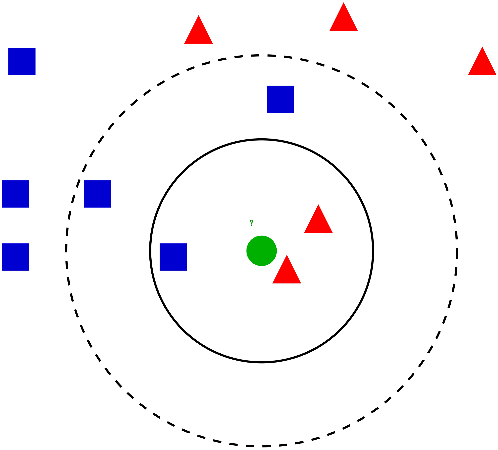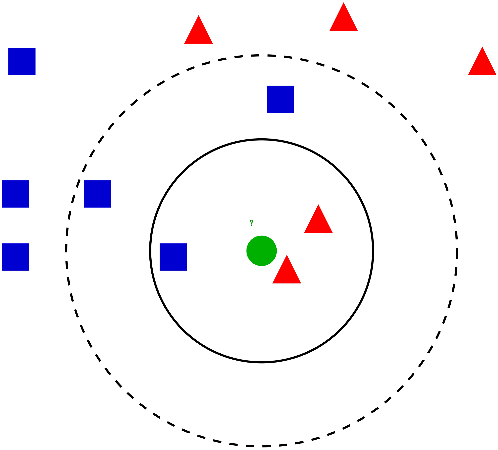 
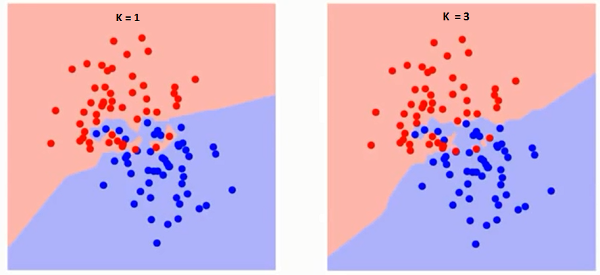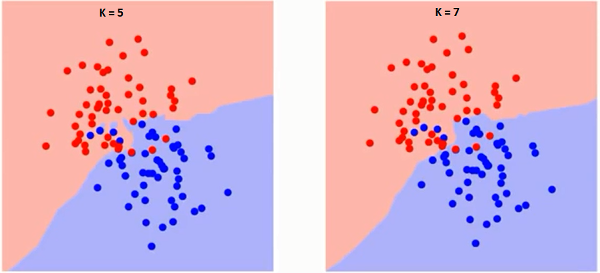

Source Link - https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

* **Regression:** For regression tasks, KNN predicts the value of the new data point by averaging the values of the 'K' nearest neighbors.

### Distance Metrics:

* **Euclidean Distance:** Most common, calculates the straight-line distance between two points.
* **Manhattan Distance:** Sums the absolute differences of coordinates.
* **Minkowski Distance:** Generalization of Euclidean and Manhattan distances.

### Advantages of KNN:

1. **Simplicity:** Easy to understand and implement.
2. **No Training Phase:** As it stores the training data, there's no explicit training phase.
3. **Adaptability:** Can be used for both classification and regression problems.
4. **Flexibility:** Can handle multi-class problems and different types of features.

### Disadvantages of KNN:

1. **Computational Complexity:** The algorithm can be slow, especially with large datasets, as it computes distances for all data points.
2. **Memory Consumption:** Requires storing the entire training dataset, which can be a problem for large datasets.
3. **Distance Metric Dependency:** Performance can be highly dependent on the choice of distance metric and scaling of features.
4. **Curse of Dimensionality:** As the number of features increases, the distance between points becomes less meaningful, which can degrade performance.

## Working with Data:

* **Feature Scaling:** KNN is sensitive to the scale of features. Standardization or normalization is often necessary to ensure that all features contribute equally to the distance calculation.
* **Choosing 'K':** The value of 'K' (number of neighbors) is crucial. A small 'K' can be noisy and susceptible to outliers, while a large 'K' can smooth out the decision boundary and potentially overlook important details.
* **Distance Metric Selection:** Depending on the problem, different distance metrics may be more appropriate. Testing different metrics can help improve performance.
* **Handling Missing Values:** KNN can be sensitive to missing values. Imputation or other techniques might be needed to handle missing data effectively.
* **Data Imbalance:** For classification problems, if the classes are imbalanced, KNN might be biased towards the majority class. Techniques like weighting the neighbors or using different metrics can help address this.

# Import Basic Libraries

In [3]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Reading and Describing the Data
Dataset Link - https://www.kaggle.com/datasets/saurabh00007/diabetescsv

In [6]:
df = pd.read_csv("diabetes.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


1. **`Pregnancies`**:This column represents the number of times a woman has been pregnant. It’s a count variable and is often considered because pregnancy-related glucose intolerance can affect diabetes risk.

2. **`Glucose`**:This indicates the glucose concentration in the blood. High levels of glucose are a strong indicator of diabetes or prediabetes. Glucose measurements are usually taken after fasting.

3. **`BloodPressure`**:This is the diastolic blood pressure (measured in mm Hg). Blood pressure is a significant factor as high blood pressure is often associated with diabetes and cardiovascular risk.

4. **`SkinThickness`**:This represents the thickness of the triceps skinfold, measured in millimeters (mm). It is used to estimate the amount of subcutaneous fat, which is related to insulin resistance.

5. **`Insulin`**:This column measures the serum insulin level (in μU/mL). Abnormal insulin levels can indicate issues with insulin production or resistance, both of which are related to diabetes.

6. **`BMI`**:Body Mass Index (BMI) is a measure of body fat based on height and weight. It is calculated as weight in kilograms divided by the square of height in meters. A high BMI is a strong risk factor for diabetes.

7. **`Pedigree`**:The diabetes pedigree function provides a score that represents the likelihood of diabetes based on family history and other genetic factors. It’s a measure of genetic predisposition.

8. **`Age`**:Age is a straightforward column representing the age of the individuals in years. Age is an important factor as the risk of diabetes typically increases with age.

9. **`Outcome`**:This is the target variable, which indicates whether or not the individual has diabetes. It is usually binary, where 0 represents non-diabetic and 1 represents diabetic.

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory Data Analysis

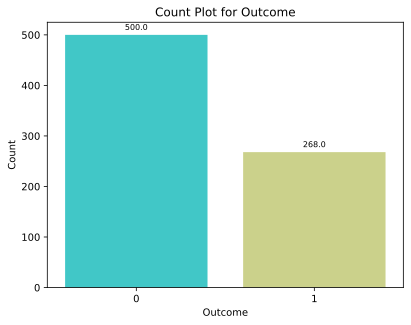

In [11]:
ax = sns.countplot(x='Outcome', data=df, palette = 'rainbow')
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Count Plot for Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

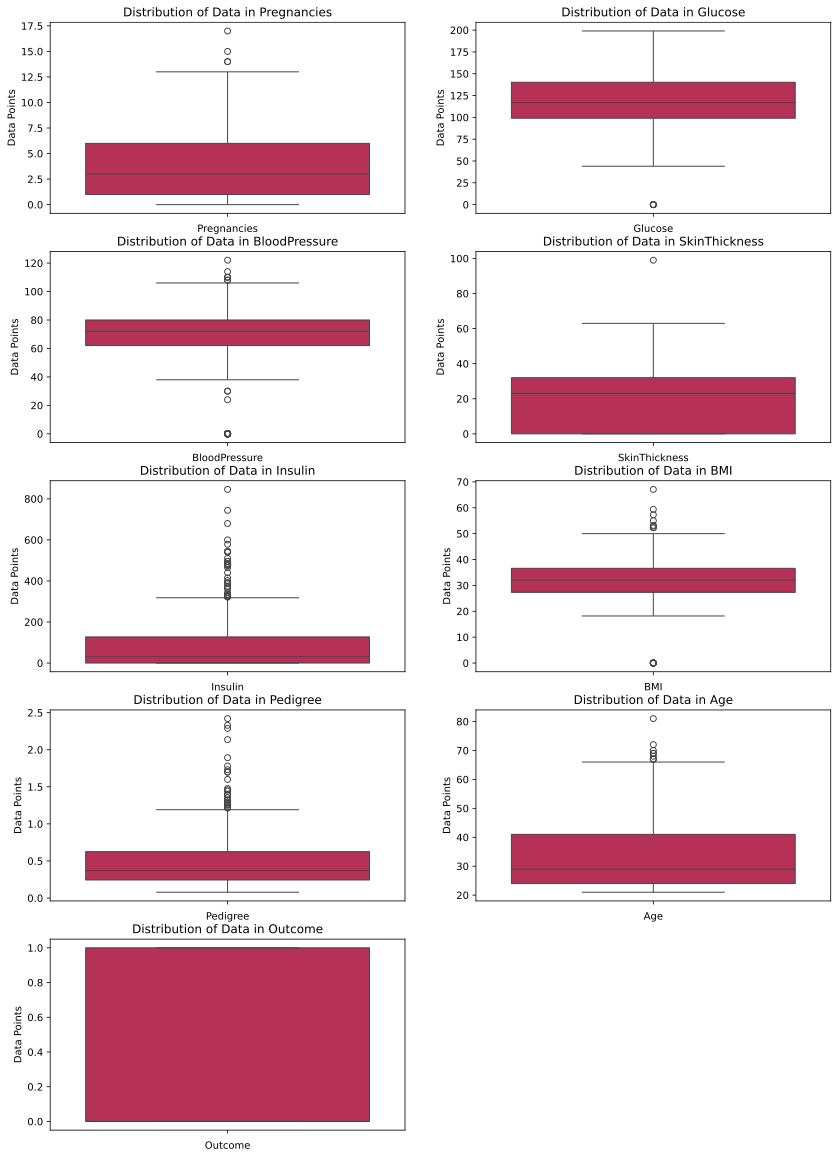

<Figure size 1000x800 with 0 Axes>

In [12]:
n_cols = 2
n_rows = (len(df.columns) + 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), sharex=False)
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(ax=axes[i], y=df[col], palette='rocket')
    axes[i].set_title(f'Distribution of Data in {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Data Points')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()

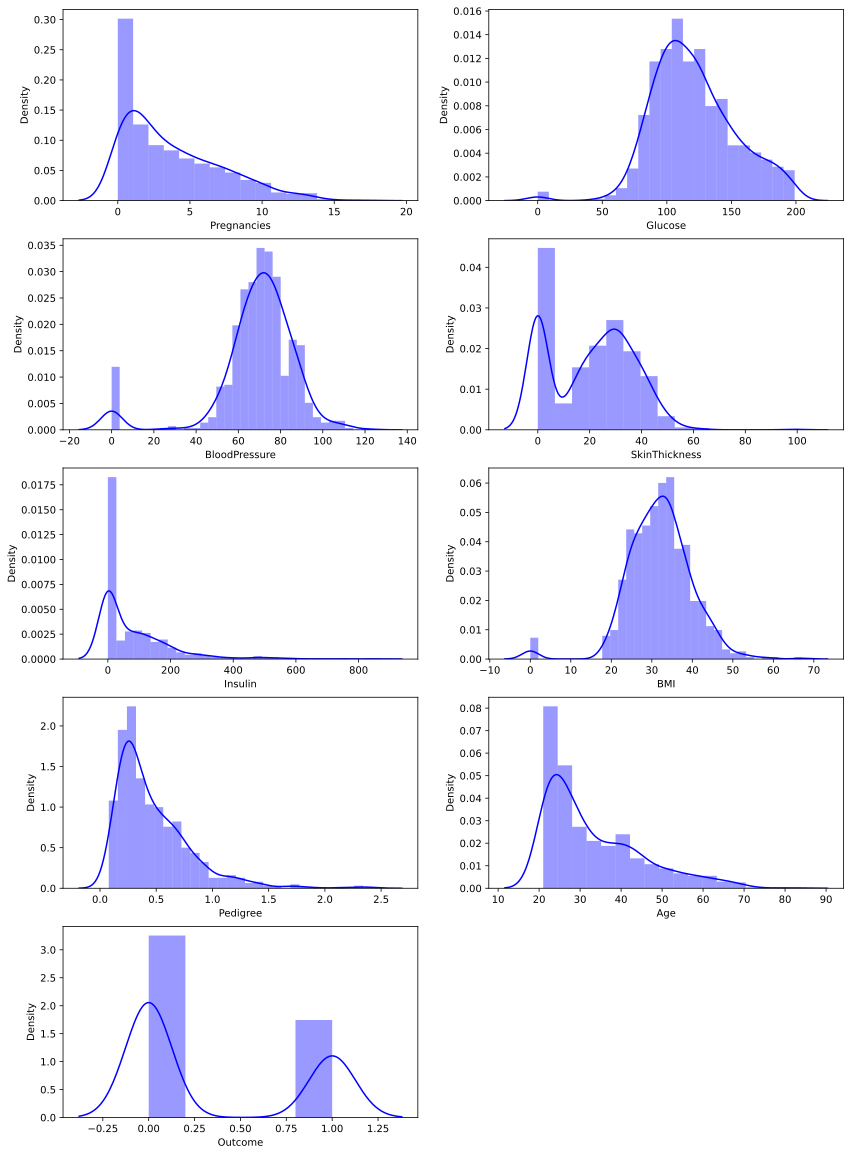

<Figure size 1000x800 with 0 Axes>

In [13]:
n_cols = 2
n_rows = (len(df.columns) + 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), sharex=False)
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.distplot(ax=axes[i], x=df[col], color = 'blue')
    axes[i].set_xlabel(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()

# Data Preprocessing

In [15]:
means = df.mean()
stds = df.std()

def calculate_zscore(value, mean, std):
    return (value - mean) / std
z_scores = {}
for col in df.columns:
    z_scores[col] = [calculate_zscore(value, means[col], stds[col]) for value in df[col]]

threshold = 3
outliers = {}
for col, scores in z_scores.items():
    outliers[col] = [value for value, score in zip(df[col], scores) if np.abs(score) > threshold]

for col, outlier_values in outliers.items():
    print(f"{col}: {outlier_values}")

Pregnancies: [15, 17, 14, 14]
Glucose: [0, 0, 0, 0, 0]
BloodPressure: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
SkinThickness: [99]
Insulin: [543, 846, 495, 485, 495, 478, 744, 680, 545, 465, 579, 474, 480, 600, 440, 540, 480, 510]
BMI: [0.0, 0.0, 0.0, 0.0, 0.0, 67.1, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]
Pedigree: [2.288, 1.893, 1.781, 2.329, 1.476, 2.137, 1.731, 1.6, 2.42, 1.699, 1.698]
Age: [69, 72, 81, 70, 69]
Outcome: []


In [16]:
def calculate_whiskers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    lower_whisker = df.apply(lambda x: x[x >= (Q1[x.name] - 1.5 * IQR[x.name])].min())

    upper_whisker = df.apply(lambda x: x[x <= (Q3[x.name] + 1.5 * IQR[x.name])].max())

    return lower_whisker, upper_whisker

lower_whisker, upper_whisker = calculate_whiskers(df)

whiskers_df = pd.DataFrame({
    'Column': df.columns,
    'Lower Whisker': lower_whisker,
    'Upper Whisker': upper_whisker
}).reset_index(drop=True)


print(whiskers_df)

          Column  Lower Whisker  Upper Whisker
0    Pregnancies          0.000         13.000
1        Glucose         44.000        199.000
2  BloodPressure         38.000        106.000
3  SkinThickness          0.000         63.000
4        Insulin          0.000        318.000
5            BMI         18.200         50.000
6       Pedigree          0.078          1.191
7            Age         21.000         66.000
8        Outcome          0.000          1.000


In [17]:
whiskers = {
    'Pregnancies': (0.000, 13.000),
    'Glucose': (44.000, 199.000),
    'BloodPressure': (38.000, 106.000),
    'SkinThickness': (0.000, 63.000),
    'Insulin': (0.000, 318.000),
    'BMI': (18.200, 50.000),
    'Pedigree': (0.078, 1.191),
    'Age': (21.000, 66.000),
    'Outcome': (0.000, 1.000)
}
for column, (lower, upper) in whiskers.items():
    df = df[(df[column] >= lower) & (df[column] <= upper)]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    639 non-null    int64  
 1   Glucose        639 non-null    int64  
 2   BloodPressure  639 non-null    int64  
 3   SkinThickness  639 non-null    int64  
 4   Insulin        639 non-null    int64  
 5   BMI            639 non-null    float64
 6   Pedigree       639 non-null    float64
 7   Age            639 non-null    int64  
 8   Outcome        639 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.9 KB


# Exploring Preprocessed Data

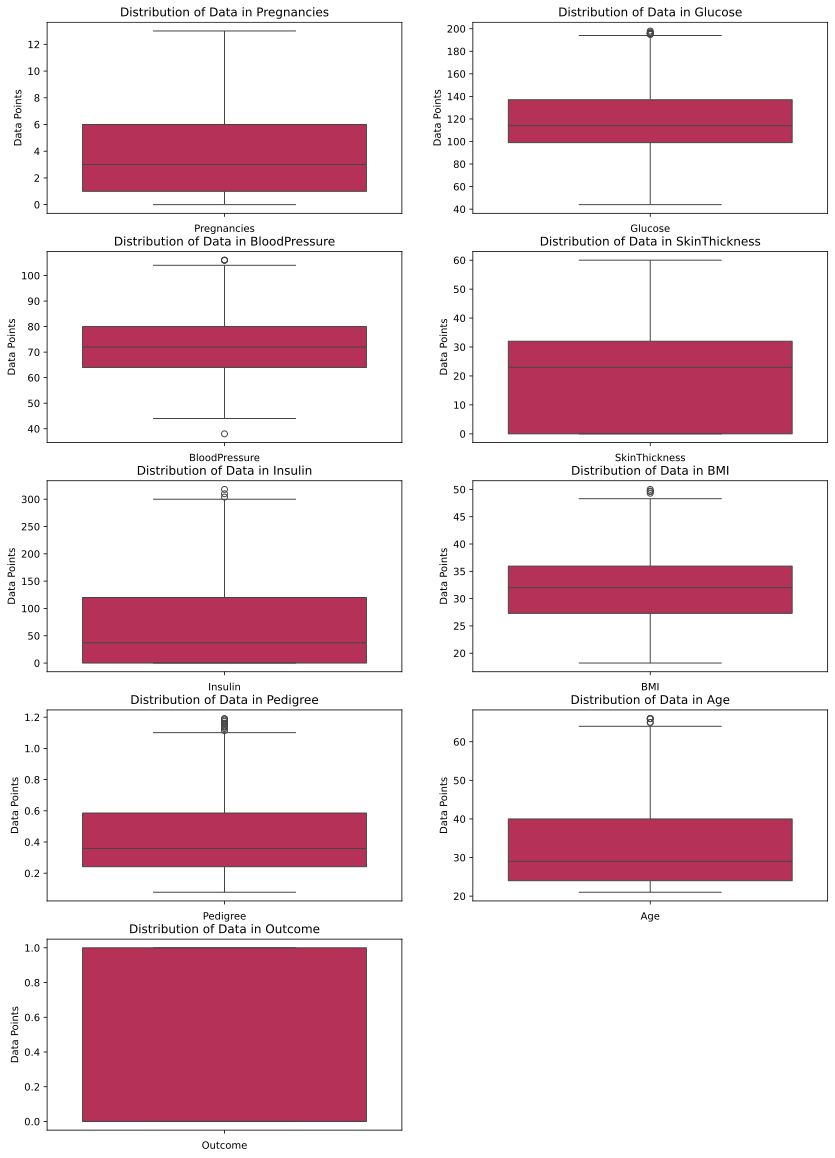

<Figure size 1000x800 with 0 Axes>

In [20]:
n_cols = 2
n_rows = (len(df.columns) + 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), sharex=False)
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(ax=axes[i], y=df[col], palette='rocket')
    axes[i].set_title(f'Distribution of Data in {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Data Points')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()

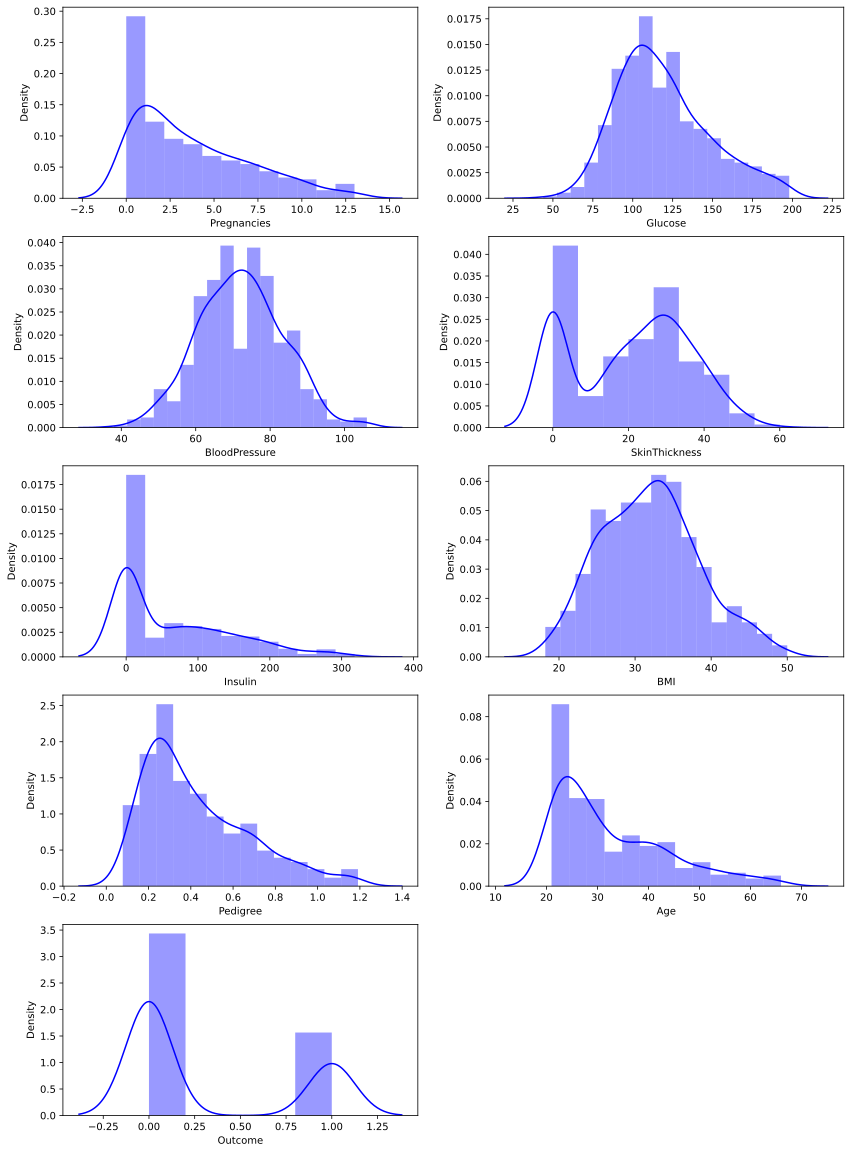

<Figure size 1000x800 with 0 Axes>

In [21]:
n_cols = 2
n_rows = (len(df.columns) + 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), sharex=False)
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.distplot(ax=axes[i], x=df[col], color = 'blue')
    axes[i].set_xlabel(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()

#### Deifining X and y varaible as independent and dependent variable.

In [23]:
X = df.drop(['Outcome'], axis =1)

In [24]:
y = df['Outcome']

# Model Building

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

### Getting Optimal value of k

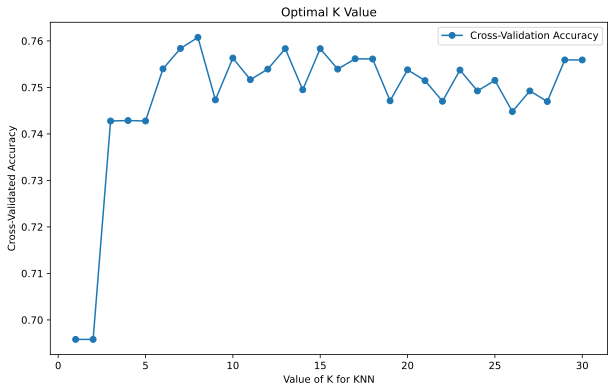

The optimal k value is: 8


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn_optimal = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', n_jobs=-1)
    scores = cross_val_score(knn_optimal, X_train, y_train, cv=10, scoring='accuracy')  # 10-fold cross-validation
    k_scores.append(scores.mean())

# Plot the accuracy scores vs. k values
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', label = 'Cross-Validation Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal K Value')
plt.legend()
plt.show()

# Find the best k value
optimal_k = k_range[np.argmax(k_scores)]
print(f"The optimal k value is: {optimal_k}")

### Building KNN Model on Optimal Value of K

In [30]:
knn = KNeighborsClassifier(
    n_neighbors=optimal_k,  
    weights='distance',     
    algorithm='auto',       
    leaf_size=30,           
    p=2,                    
    metric='minkowski',     
    n_jobs=-1               
)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=8, weights='distance')

### Getting Feature Importance

## Model Explained
1. **`n_neighbors=optimal_k`:** This specifies the number of neighbors to consider when making predictions. `optimal_k` is the value you've determined to be most effective for your model. A typical approach to finding this value is through cross-validation.

2. **`weights='distance`:** This parameter controls how the neighbors' votes are weighted. With `'distance'`, closer neighbors have a greater influence on the prediction than farther ones. This can help improve accuracy if the distribution of data points is uneven.

3. **`algorithm='auto'`:** This tells KNN to choose the best algorithm based on the data provided. The algorithms available are:
     - `'ball_tree'`: Efficient for high-dimensional data.
     - `'kd_tree'`: Good for low-dimensional data.
     - `'brute'`: Uses a brute-force approach to compute distances.
     - `'auto'`: Automatically selects the best algorithm based on the input data.


4. **`leaf_size=30`:** This is used only when `algorithm='ball_tree'` or `algorithm='kd_tree'`. It controls the size of the leaf nodes in the tree. A smaller leaf size means the tree is more detailed, which can speed up queries but slow down the training. Conversely, a larger leaf size makes the tree simpler, which can make queries faster but might increase training time.

5. **`p=2`:** This parameter is used with the `metric='minkowski'`. The value of `p` determines the type of distance metric to use:
     - `p=1` corresponds to Manhattan distance.
     - `p=2` corresponds to Euclidean distance. 


6. **`metric='minkowski'`:** This specifies the distance metric to use for calculating the distance between data points. `'minkowski'` is a generalization of Euclidean and Manhattan distances, depending on the value of `p`.

7. **`n_jobs=-1`:** This parameter controls the number of parallel jobs to run. `-1` means using all available cores to speed up computation.

### Summary:

Model uses `optimal_k` neighbors and weights the neighbors based on their distance from the query point. It selects the most suitable algorithm automatically for distance computation and uses the Minkowski distance with `p=2` (Euclidean distance).This configuration is designed to balance accuracy and efficiency, especially with the `weights='distance'` setting which often improves performance by giving more importance to nearer neighbors.

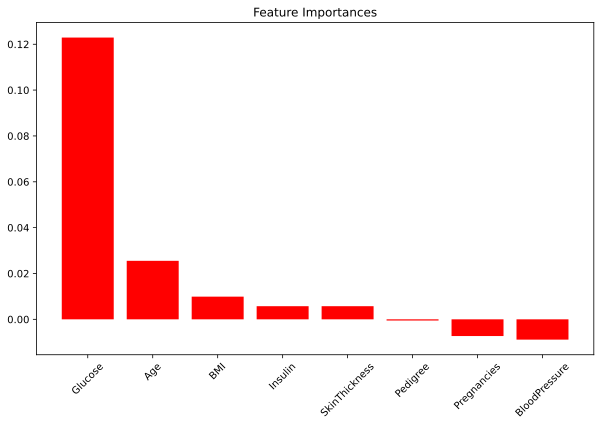

In [33]:
from sklearn.inspection import permutation_importance

# Assuming you have your feature names in a list
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age']

# Calculate permutation importance
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

# Plotting the feature importances
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center", color = 'red')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation = 45)
plt.show()

# Model Evaluation

In [35]:
y_pred = knn.predict(X_test)

In [36]:
accuracy_optimal = accuracy_score(y_test, y_pred)
print(f"Accuracy with optimal k={optimal_k}: {accuracy_optimal:.2f}")

Accuracy with optimal k=8: 0.77


In [37]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       132
           1       0.70      0.47      0.56        60

    accuracy                           0.77       192
   macro avg       0.74      0.69      0.70       192
weighted avg       0.76      0.77      0.76       192



Confusion Matrix:


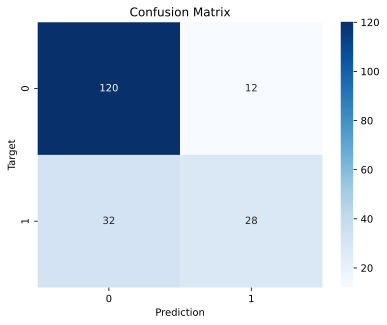

In [38]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = 'Blues', cbar = True, annot = True, fmt= ".4g")
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.show()

0.7765151515151515


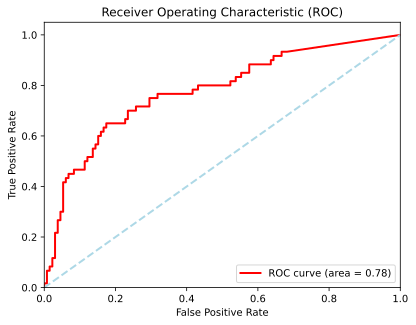

In [39]:
if len(set(y_test)) == 2: # because binary classification problem
    y_prob = knn.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print(roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='lightblue', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Model Performance

| **Metric**                     | **Class 0** | **Class 1** | **Overall** | **Interpretation**                                                                 |
|--------------------------------|-------------|-------------|-------------|-------------------------------------------------------------------------------------|
| **Precision**                  | 0.79        | 0.70        | 0.76 (Weighted Average) | Precision measures the accuracy of positive predictions. Class `0` has higher precision, indicating fewer false positives compared to Class `1`. |
| **Recall**                     | 0.91        | 0.47        | 0.77 (Weighted Average) | Recall measures the ability to capture all relevant instances. Class `0` has high recall, meaning it successfully identifies most of its instances. Class `1` has lower recall, indicating missed instances. |
| **F1-Score**                   | 0.85        | 0.56        | 0.76 (Weighted Average) | The F1-Score balances precision and recall. Class `0` has a higher F1-Score, reflecting a better balance between precision and recall compared to Class `1`. |
| **Support**                    | 132         | 60          | 192         | Support indicates the number of actual occurrences of each class in the test dataset. Class `0` has more instances than Class `1`. |
| **Accuracy**                   | -           | -           | 0.77        | Accuracy is the proportion of correctly predicted instances out of all instances. The model correctly predicts 77% of the cases. |
| **ROC AUC**                    | -           | -           | 0.7765      | ROC AUC measures the model's ability to distinguish between classes. An AUC of 0.7765 indicates a good level of discrimination. |


**Confusion Matrix:**

`[[120  12] [ 32  28]]` means:
  - **True Negatives (TN):** 120 (correctly predicted negatives, i.e., Class `0`).
  - **False Positives (FP):** 12 (incorrectly predicted as positive, i.e., Class `1`).
  - **False Negatives (FN):** 32 (incorrectly predicted as negative, i.e., Class `0`).
  - **True Positives (TP):** 28 (correctly predicted positives, i.e., Class `1`).
  - **Out of 192 test cases,** the model made 44 errors (32 false negatives and 12 false positives), reflecting a mixed performance with room for improvement in classifying positives and minimizing false negatives.

In [41]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age']

user_input = {}
for feature in feature_names:
    while True:
        try:
            value = float(input(f"Enter value for {feature}: "))
            print(f'Enter {feature} value : {value}')
            user_input[feature] = value
            break
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

user_data = np.array([user_input[feature] for feature in feature_names]).reshape(1, -1)

prediction = knn.predict(user_data)
print(f"The predicted class for the input data is: {prediction[0]}")

Enter value for Pregnancies:  4


Enter Pregnancies value : 4.0


Enter value for Glucose:  89


Enter Glucose value : 89.0


Enter value for BloodPressure:  110


Enter BloodPressure value : 110.0


Enter value for SkinThickness:  32


Enter SkinThickness value : 32.0


Enter value for Insulin:  150


Enter Insulin value : 150.0


Enter value for BMI:  45


Enter BMI value : 45.0


Enter value for Pedigree:  0.8


Enter Pedigree value : 0.8


Enter value for Age:  23


Enter Age value : 23.0
The predicted class for the input data is: 0
